**Q_1_to_5**

Preamble: Download breast cancer dataset from sklearn and answer the questions:1-5


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [ ]:
# How many features are there in the data set?

X.shape, y.shape

((569, 30), (569,))

In [ ]:
# How many unique classes are there in the dataset?

y.unique()

array([0, 1])

In [ ]:
# How many samples correspond to class 0?

y.value_counts()

1    357
0    212
Name: target, dtype: int64

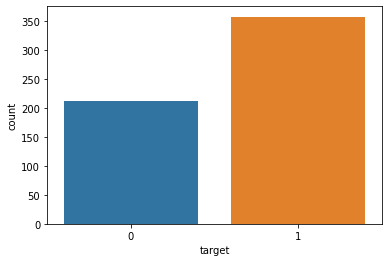

In [ ]:
sns.countplot(x=y)

In [ ]:
# Is there any categorical feature? NO

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# What is the pearson correlation between the features 'mean perimeter' and 'mean radius'?

X['mean perimeter'].corr(X['mean radius'])

0.9978552814938106

---

**Q_6**

In [ ]:
# Take a matrix [[7, 16, 31], [np.nan, np.nan, 66], [12, 5, np.nan],[98, np.nan, 92]].
# Impute the missing values in the matrix using SimpleImputer with Mean What is the imputed matrix using fit_transform?

from sklearn.impute import SimpleImputer
mat = [[7,16,31], [np.nan,np.nan,66], [12,5,np.nan], [98,np.nan,92]]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit_transform(mat)

array([[ 7. , 16. , 31. ],
       [39. , 10.5, 66. ],
       [12. ,  5. , 63. ],
       [98. , 10.5, 92. ]])

**Q_7**

In [ ]:
# Import FunctionTransformer from the SkLearn library.
#   Apply log base 10 to the elements of the following array : [[1, 1], [2, 3],[10,100]] .     
#   What is the resultant matrix?

from sklearn.preprocessing import FunctionTransformer
mat2 = [[1,1], [2,3], [10,100]]
transf = FunctionTransformer(np.log10)
transf.fit_transform(mat2)

array([[0.        , 0.        ],
       [0.30103   , 0.47712125],
       [1.        , 2.        ]])

**Q_8**

In [ ]:
# Read the CSV file from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data, 
# define the column headers as `'sepal length', 'sepal width', 'petal length', 'petal width','label'.
# Generate a new feature matrix consisting of all polynomial combinations of the features with degree 2 
# (For example, if an input sample is two dimensional and of the form [a,b] , 
# the degree-2 polynomial features are [1,a,b,a^2,ab,b^2][1,a,b,a^2,ab,b^2]).
# What are the shapes of the feature matrix before and after the polynomial transformation?

url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
cols = ['sepal length', 'sepal width', 'petal length', 'petal width','label']
data = pd.read_csv(url, names=cols)
data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_transf = PolynomialFeatures(degree=2)
print("Number of features before Trainformation", data.shape)
transformed = poly_transf.fit_transform(data.iloc[:,:-1])
print("Number of features after Trainformation", transformed.shape)

Number of features before Trainformation (150, 5)
Number of features after Trainformation (150, 15)


**Q_9**

In [ ]:
# Import the California Housing dataset and SelectPercentile, mutual_info_regression.
# Select features according to 10 percentile of the highest scores What is the shape of the feature matrix after feature selection?

from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
print("Shape before transform :", X.shape)
selector = SelectPercentile(mutual_info_regression, percentile=10)
X_new = selector.fit_transform(X, y)
print("Shape after transform :", X_new.shape)

Shape before transform : (20640, 8)
Shape after transform : (20640, 1)


**Q_10 - Q_14**

In [ ]:
# Import the California Housing dataset.
# Load the features and labels as numpy array. Split the data into training and test data in 4:1 proportion. 
# What will be the size of training features?

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
# type(X), type(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Shape of the training set :", X_train.shape)
print("Size of the training features :", X_train.shape[1])

Shape of the training set : (16512, 8)
Size of the training features : 8


In [ ]:
# Use the strategy 'mean' to predict all the labels. Calculate the coefficient of determination R^2 of the prediction.

from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score
# ?r2_score
reg = DummyRegressor(strategy='mean')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_test, y_pred)
print("r2_score :", score)

r2_score : -0.0014734336890012134


In [ ]:
# Fit the training dataset using Iterative Optimization, i.e., SGDRegressor 
# (Keep all the parameters default) after scaling the features using MinMaxscalar.
# Calculate the mean absolute error for training data?
# Calculate the mean absolute error for test data?

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

reg = SGDRegressor()
reg.fit(X_train, y_train)

training_mae = mean_absolute_error(y_train, reg.predict(X_train))
test_mae = mean_absolute_error(y_test, reg.predict(X_test))
print("Calculated Mean Abs Error for Training Data :", training_mae)
print("Calculated Mean Abs Error for Test Data :", test_mae)

Calculated Mean Abs Error for Training Data : 0.5616801747493438
Calculated Mean Abs Error for Test Data : 0.5595929665391217


In [ ]:
# print the scores that are calculated using 5 fold cross validation using LinearRegression on entire dataset.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
reg = LinearRegression()
cross_val_score(estimator=reg,
                cv=5,
                X=X,
                y=y,
                n_jobs=-1)

array([0.54866323, 0.46820691, 0.55078434, 0.53698703, 0.66051406])

**Q_15 - Q_18**

In [ ]:
# Import the diabetes dataset from sklearn and check how many samples are there in the dataset?

from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True, as_frame=True)
X.shape

(442, 10)

- Step-1: Use Standard scaler to preprocess the data.
- Step-2: Split the dataset in such a way that 20% data is taken for test cases.(set random state=10)
- Step-3: Use the LinearRegression() estimator to predict the output.

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
reg = LinearRegression()

In [ ]:
# What is the R^2 score you got using LinearRegression estimator on test data.

from sklearn.metrics import r2_score
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.5341962544929234

In [ ]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
# What is the value of cofficient associated with variable "s3"?

for col, coef in zip(X.columns,reg.coef_):
    print(col, '\t', coef)

reg.coef_

age 	 -0.1852401513375421
sex 	 -10.743953582575292
bmi 	 23.970684209248542
bp 	 15.44649017582437
s1 	 -33.63629411769096
s2 	 19.07747444809865
s3 	 3.8775111593961995
s4 	 10.518311941486331
s5 	 34.15440846650077
s6 	 1.9136249415743327


array([ -0.18524015, -10.74395358,  23.97068421,  15.44649018,
       -33.63629412,  19.07747445,   3.87751116,  10.51831194,
        34.15440847,   1.91362494])

In [ ]:
# Use RidgeCV to train your model and cross_validate to optimize it.
# Hint: Set parameters for crossvalidation as mentioned below.
# What is the optimum (average) "Mean absolute error" you got on training data?

from sklearn.linear_model import RidgeCV
cv = 5
alphalist = np.logspace(-4, 0, num=20)
scoring = 'neg_mean_absolute_error'
model = RidgeCV(alphas=alphalist, cv=cv, scoring=scoring)
model.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
        cv=5, scoring='neg_mean_absolute_error')

In [ ]:
model.best_score_

-45.1401388221622